### Convolutional operation

Convolution is a common operation in image processing, computer vision, and neural networks for tasks like feature extraction, blurring, sharpening, edge detection, and more.

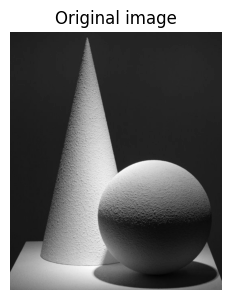

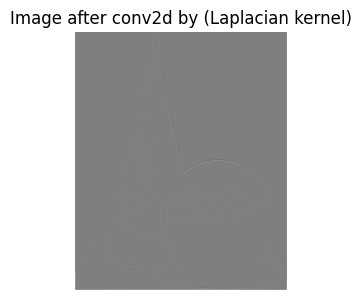

In [22]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = './geometric_obj.png'
image = Image.open(image_path).convert('L')
image_np = np.array(image, dtype=np.float32)

# Normalize the image
image_np /= 255.0

image_tensor = torch.tensor(image_np).unsqueeze(0).unsqueeze(0)

# Define an edge detection kernel (Laplacian kernel)
edge_kernel = torch.tensor([[[[0, -1, 0], 
                              [-1, 4, -1], 
                              [0, -1, 0]]]], dtype=torch.float32)

# Apply convolution
edge_detected_image = F.conv2d(image_tensor, edge_kernel, padding=1)

# Take the absolute value to enhance edges and remove negative values
#edge_detected_image = torch.abs(edge_detected_image)

# Remove extra dimensions and convert to numpy for visualization
edge_detected_image_np = edge_detected_image.squeeze().detach().numpy()

def plot(image_np, title):
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

plot(image_np, "Original image")    
plot(edge_detected_image_np, "Image after conv2d by (Laplacian kernel)")    

2024-10-31 18:43:28,559 - INFO - Original image shape (962, 788, 4)
2024-10-31 18:43:28,561 - INFO - convert(L) image shape (962, 788)
2024-10-31 18:43:28,561 - INFO - Kernel shape (3, 3)


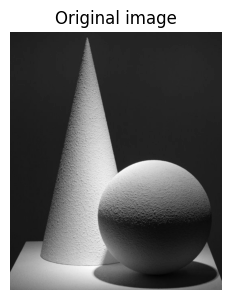

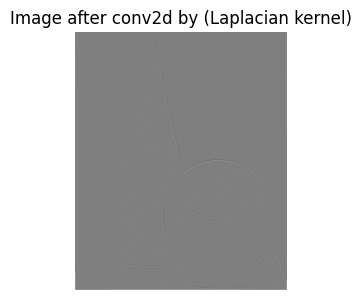

In [11]:
import logging
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

'''
The image shape (962, 788, 4) indicates that the image has the following properties:
Height: 962 pixels 
Width: 788 pixels
Channels: 4 channels
Since the shape has 4 channels, this image is likely in RGBA mode, which includes:

1 => Red channel
2 => Green channel
3 => Blue channel
4 => Alpha channel (transparency. How opaque or transparent a pixel is. 0: Fully transparent, 255: Fully opaque)
'''
image = Image.open('./geometric_obj.png')
image_np = np.array(image, dtype=np.float32)
logging.info(f'Original image shape {image_np.shape}')





def conv2d(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Apply a 2D convolution to the input image using the provided kernel.

    Parameters:
    - image (np.ndarray): Input image as a 2D array.
    - kernel (np.ndarray): Convolution kernel as a 2D array.

    Returns:
    - np.ndarray: The convolved image.
    """
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Create an output array
    output = np.zeros_like(image)

     # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Define the top-left corner of the region based on the current pixel
            top = i
            left = j

            # Extract the region of interest using slicing
            region = padded_image[top:top + kernel_height, left:left + kernel_width]

            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(region * kernel)
    
    return output

image = image.convert('L')
image_np = np.array(image, dtype=np.float32)
logging.info(f'convert(L) image shape {image_np.shape}')

kernel = np.array([[0, -1, 0], 
          [-1, 4, -1], 
          [0, -1, 0]])
logging.info(f'Kernel shape {kernel.shape}')

convoluted_img = conv2d(image_np, kernel)

def plot(image_np, title):
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

plot(image_np, "Original image")    
plot(convoluted_img, "Image after conv2d by (Laplacian kernel)")   
